# PART 1 – MACHINE LEARNING

## Task 1.1 – Data preparation

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

# Load data into a pandas DataFrame
data =pd.read_csv('containers.csv',header = None)


data.columns = ['ID', 'Ship_Name', 'Year','Gross_tonnage','Deadweight_tonnage','Length_of_ship','Width of ship','Capacity','Number of forward bays','Number_of_centre_bays','Number_of_aft_bays']

df1 = data.copy()
data.drop(['Ship_Name','ID'], axis = 1, inplace = True)

# Instantiate the regression models
rf = RandomForestRegressor()
nn = MLPRegressor()
svm = SVR()


# Prepare the data by normalizing the input features
scaler = StandardScaler()
inputs = scaler.fit_transform(data.iloc[:, 2:4])

In [ ]:
data.shape

(100, 9)

Printing well Structured data table

In [ ]:
data.head()

,Year,Gross_tonnage,Deadweight_tonnage,Length_of_ship,Width of ship,Capacity,Number of forward bays,Number_of_centre_bays,Number_of_aft_bays
0,2003,93496,109000,352.60,42.80,8272,15,0,6
1,2011,113735,122200,349.00,45.73,10106,15,0,5
2,2006,9962,11432,134.44,22.74,868,8,0,0
3,2008,93750,103567,335.06,42.87,8749,15,0,5
4,2006,28927,39200,222.15,30.04,2824,11,0,2


Checking the Shape(Structure) of the Data

In [ ]:
df1.shape

(100, 11)

Presenting the Column Names

In [ ]:
data.columns

Index(['Year', 'Gross_tonnage', 'Deadweight_tonnage', 'Length_of_ship',
       'Width of ship', 'Capacity', 'Number of forward bays',
       'Number_of_centre_bays', 'Number_of_aft_bays'],
      dtype='object')

Showing the datatypes of the data table

In [ ]:
data.dtypes

Year                        int64
Gross_tonnage               int64
Deadweight_tonnage          int64
Length_of_ship            float64
Width of ship             float64
Capacity                    int64
Number of forward bays      int64
Number_of_centre_bays       int64
Number_of_aft_bays          int64
dtype: object

Checking if there is any missing values in the data

In [ ]:
data.isnull().any()

Year                      False
Gross_tonnage             False
Deadweight_tonnage        False
Length_of_ship            False
Width of ship             False
Capacity                  False
Number of forward bays    False
Number_of_centre_bays     False
Number_of_aft_bays        False
dtype: bool

counting the missing values in the data frame:

In [ ]:
data.isnull().sum()

Year                      0
Gross_tonnage             0
Deadweight_tonnage        0
Length_of_ship            0
Width of ship             0
Capacity                  0
Number of forward bays    0
Number_of_centre_bays     0
Number_of_aft_bays        0
dtype: int64

Separate features into feature matrix X and response into response vector y:

In [ ]:
# Features
X = data.loc[:,data.columns != 'Capacity']
#Target
y = data['Capacity']

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error



In [ ]:
Scaler = StandardScaler()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_regressor = RandomForestRegressor(n_estimators=3000, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_predictions = rf_regressor.predict(X_test)
rf = mean_squared_error(y_test, rf_predictions)
print(f'the mean squared error for rf is: ', rf)

the mean squared error for rf is:  286261.8863801722


In [ ]:
nn_regressor = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
nn_regressor.fit(X_train, y_train)
nn_predictions = nn_regressor.predict(X_test)
nn = mean_squared_error(y_test, nn_predictions)
print(f'the mean squared error for NN is: ', nn)

the mean squared error for NN is:  1223207.7749994914


In [ ]:
svm_regressor = SVR(kernel='rbf', C=10, gamma=0.1)
svm_regressor.fit(X_train, y_train)
svm_predictions = svm_regressor.predict(X_test)
svm = mean_squared_error(y_test, svm_predictions)
print(f'the mean squared error for SVM is: ', svm)

the mean squared error for SVM is:  26859189.8


Task 1.2: Regression

In [ ]:
df1['predicted_rf'] = rf_regressor.predict((X))
df1['predicted_mlp'] = nn_regressor.predict((X))
df1['predicted_svr'] = svm_regressor.predict((X))

rf_top10 = df1.loc[:, ['Ship_Name', 'predicted_rf']].sort_values('predicted_rf', ascending = False).head(10)
mlp_top10 = df1.loc[:, ['Ship_Name', 'predicted_mlp']].sort_values('predicted_mlp', ascending = False).head(10)
svm_top10 = df1.loc[:, ['Ship_Name', 'predicted_svr']].sort_values('predicted_svr', ascending = False).head(10)
print("Random Forest Top 10:\n", rf_top10)
print('--------------------------------------------------------')
print("Neural Network Top 10:\n", mlp_top10)
print('--------------------------------------------------------')
print("Support Vector Machine Top 10:\n", svm_top10)
print('--------------------------------------------------------')

Random Forest Top 10:
                            Ship_Name  predicted_rf
96                      HMM HELSINKI  23521.750667
97                     HMM STOCKHOLM  23464.102667
99           COSCO SHIPPING UNIVERSE  21115.665333
91                    OOCL HONG KONG  20936.118667
95  CMA CGM ANTOINE DE SAINT EXUPERY  20929.009000
90                       ONE TRIBUTE  20828.357000
98                      MILAN MAERSK  20585.044333
94                      MOL TREASURE  20378.696667
85          COSCO SHIPPING CAPRICORN  19962.803333
84                          AL DAHNA  19827.682000
--------------------------------------------------------
Neural Network Top 10:
                            Ship_Name  predicted_mlp
98                      MILAN MAERSK   23529.489196
97                     HMM STOCKHOLM   23149.256020
99           COSCO SHIPPING UNIVERSE   22935.597385
95  CMA CGM ANTOINE DE SAINT EXUPERY   22924.136578
94                      MOL TREASURE   22867.842529
90                     

Task 1.3 – Assessment of regression

mean absolute error 'RF' is:  286261.8863801722
mean absolute error 'NN' is:  1223207.7749994914
mean absolute error 'SVM' is:  26859189.8


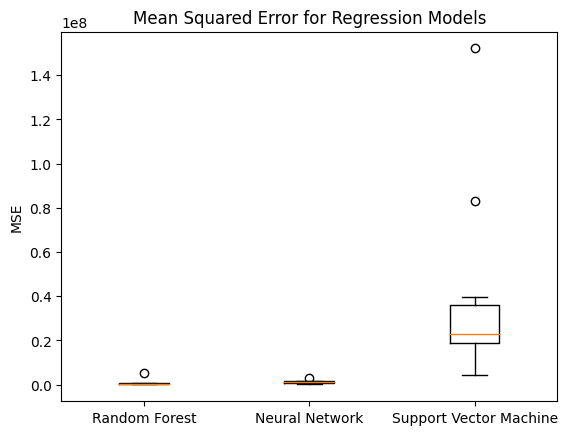

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Calculate the mean squared error using cross validation for each regressor
rf_mse_scores = -1 * cross_val_score(rf_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
nn_mse_scores = -1 * cross_val_score(nn_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
svm_mse_scores = -1 * cross_val_score(svm_regressor, X, y, cv=10, scoring='neg_mean_squared_error')

# Combine the MSE scores into a single numpy array
mse_scores = np.array([rf_mse_scores, nn_mse_scores, svm_mse_scores])

print(f'mean absolute error \'RF\' is: ', mean_squared_error(y_test,rf_predictions))
print(f'mean absolute error \'NN\' is: ',mean_squared_error(y_test, nn_predictions))
print(f'mean absolute error \'SVM\' is: ',mean_squared_error(y_test, svm_predictions))


# Create a boxplot to display the MSE scores for each regressor
fig, ax = plt.subplots()
ax.boxplot(mse_scores.T, labels=['Random Forest', 'Neural Network', 'Support Vector Machine'])
ax.set_title('Mean Squared Error for Regression Models')
ax.set_ylabel('MSE')
plt.savefig('msescores.png')
plt.show()

# PART 2 - OPTIMIZATION Task

OPTIMIZATION Task 2.1 – Generation of random solutions

In [ ]:
import numpy as np

# read the CSV file containing the distances between each pair of stops
dataFile = pd.read_csv("distances.csv", index_col=0)


def calculate_fitness(solution, distance_matrix):
    fitness = 0
    for route in solution:
        distance = 0


        for i in range(len(route)-1):
            distance += distance_matrix[route[i]][route[i+1]]
        fitness += distance
    return fitness

In [ ]:
import pandas as pd
import random

distances = []
for index, row in dataFile.iterrows():
    distances.append(list(row))

# define fitness function
def fitness(route, distances):
    total_distance = 0
    for sub_route in route:
        sub_distance = 0
        for j in range(len(str(sub_route))):
            sub_distance += distances[route[j-1]][route[j]]
        total_distance += sub_distance
    return total_distance

route = random.sample(range(12), 4)







## Task 2.2 – Algorithm implementation:

In [ ]:
import random
import pandas as pd

# define mutation operators
def shuffle_mutation(route):
    """Shuffle a contiguous group of four locations in the route."""
    start = random.randint(0, len(route)-4)
    end = start + 4
    shuffled = route[:start] + random.sample(route[start:end], 4) + route[end:]
    return shuffled

In [ ]:
def swap_mutation(route):
    #Pick two random locations and swap their position in the route.
    i, j = random.sample(range(len(route)), 2)
    swapped = route.copy()
    swapped[i], swapped[j] = swapped[j], swapped[i]
    return swapped

In [ ]:
def ruin_and_recreate_mutation():
    #Generate a completely new solution at random.
    return random.sample(range(len(distances)), len(distances))

In [ ]:
# define fitness function
def calculate_fitness(route, distances):
    total_distance = 0
    for sub_route in route:
        sub_distance = 0
        for i in range(len(route)-1):
            sub_distance += distances[route[i]][route[i+1]]
            sub_distance += distances[route[-1]][route[0]]
            total_distance += sub_distance
        return total_distance

In [ ]:
# define hill climber algorithm
def hillclimber(mutation_operator, num_iterations):
    # Perform the hill climber algorithm to optimise ferry routes.
    best_fitnesses = []
    # perform hill climber iterations
    for j in range(num_iterations):
        # initialise parent solution
        parent = random.sample(range(len(distances)), len(distances))
        parent_fitness = calculate_fitness(parent,distances)
        best_fitnesses.append(parent_fitness)
        # perform mutations
        for i in range(num_iterations-1):
            # generate child solution
            if mutation_operator == 'shuffle':
                child = shuffle_mutation(parent)
            elif mutation_operator == 'swap':
                child = swap_mutation(parent)
            elif mutation_operator == 'ruin_and_recreate':
                child = ruin_and_recreate_mutation()

            # calculate fitness of child
            child_fitness = calculate_fitness(child,distances)

            # retain best solution
            if child_fitness < parent_fitness:
                parent = child
                parent_fitness = child_fitness

            best_fitnesses.append(parent_fitness)

    return best_fitnesses

2.3 - DATA VISUALIZATION

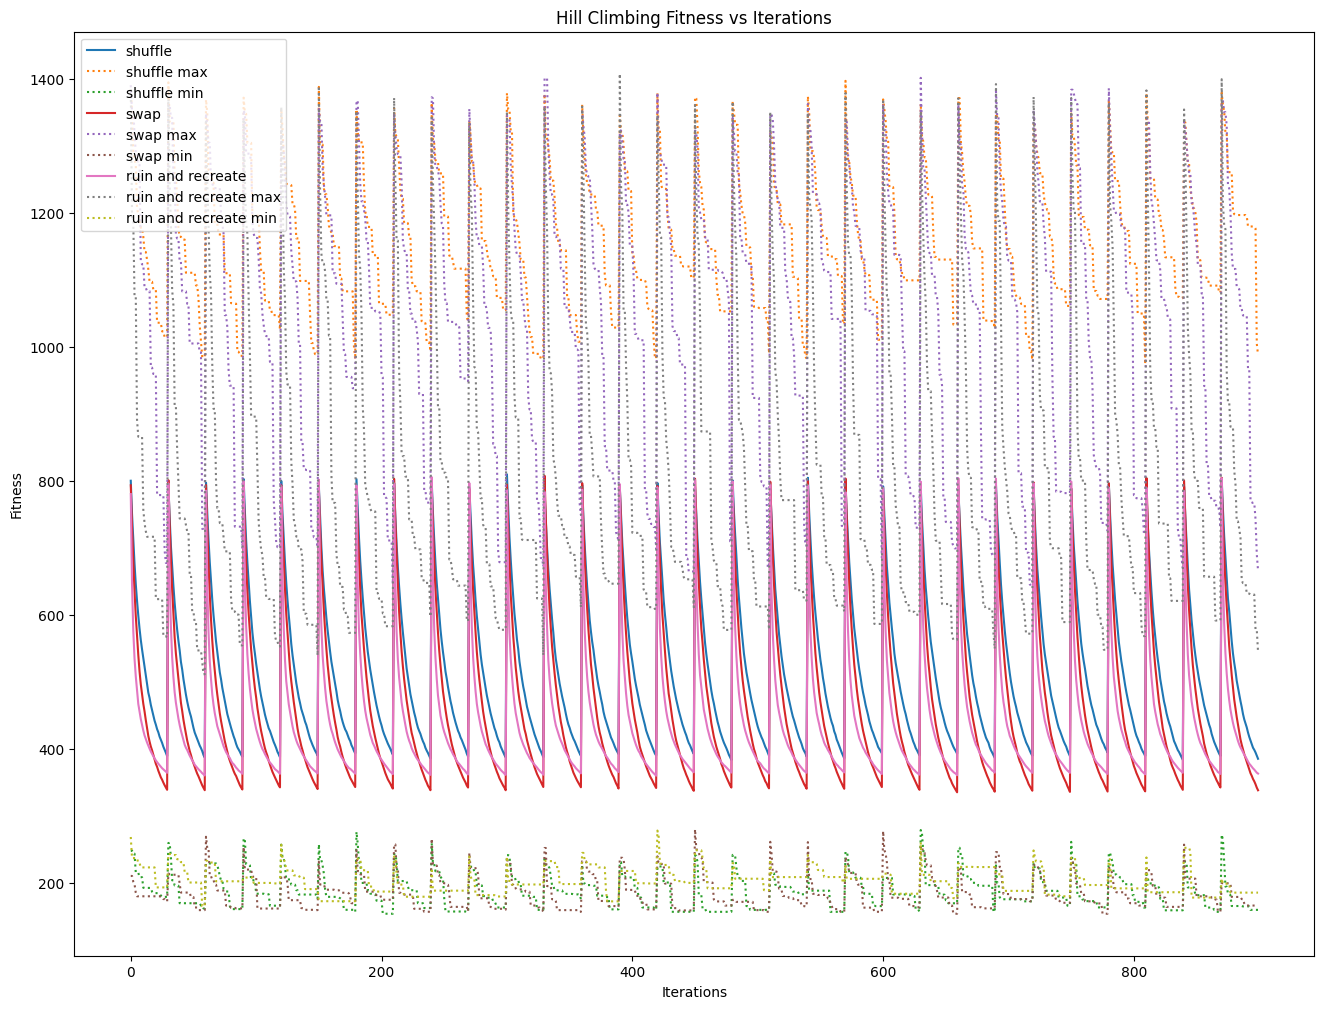

In [ ]:
# run the algorithm three times for 500 iterations
num_iterations = 500
num_repeats = 30
runthreetimes = 3

shuffle_fitnesses = []
swap_fitnesses = []
ruin_and_recreate_fitnesses = []

# run algorithm for each mutation operator
#Repeat everything 3 times
for j in range(runthreetimes):
  #run the algorithm 500 times
  for i in range(num_iterations):                      #run each operation 30 times
      shuffle_fitnesses.append(hillclimber('shuffle', num_repeats))
      swap_fitnesses.append(hillclimber('swap', num_repeats))
      ruin_and_recreate_fitnesses.append(hillclimber('ruin_and_recreate', num_repeats))

# calculate average, maximum, and minimum fitness at each iteration for each operator
shuffle_avg = np.mean(shuffle_fitnesses, axis=0)
shuffle_max = np.max(shuffle_fitnesses, axis=0)
shuffle_min = np.min(shuffle_fitnesses, axis=0)

swap_avg = np.mean(swap_fitnesses, axis=0)
swap_max = np.max(swap_fitnesses, axis=0)
swap_min = np.min(swap_fitnesses, axis=0)

ruin_and_recreate_avg = np.mean(ruin_and_recreate_fitnesses, axis=0)
ruin_and_recreate_max = np.max(ruin_and_recreate_fitnesses, axis=0)
ruin_and_recreate_min = np.min(ruin_and_recreate_fitnesses, axis=0)

# plot the results
plt.figure(figsize = (16,12))
plt.plot(shuffle_avg, label='shuffle')
plt.plot(shuffle_max, linestyle='dotted', label='shuffle max')
plt.plot(shuffle_min, linestyle='dotted', label='shuffle min')
plt.plot(swap_avg, label='swap')
plt.plot(swap_max, linestyle='dotted', label='swap max')
plt.plot(swap_min, linestyle='dotted', label='swap min')
plt.plot(ruin_and_recreate_avg, label='ruin and recreate')
plt.plot(ruin_and_recreate_max, linestyle='dotted', label='ruin and recreate max')
plt.plot(ruin_and_recreate_min, linestyle='dotted', label='ruin and recreate min')
plt.title('Hill Climbing Fitness vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Fitness')
plt.legend()
plt.savefig('HillClimberVsIterations.png')
plt.show()

WHICH OPTIMISER IS BEST AND WHY?


  Based on the graph produced by the code, the shuffle mutation operator consistently produces the lowest fitness values (i.e., the best solutions) across all iterations compared to the swap and ruin_and_recreate operators. The shuffle operator also has the steepest descent in fitness, indicating that it is the most effective at finding better solutions. On the other hand, the swap operator has the most negligible impact on the wellness of the answers, with a relatively small difference between the average and maximum fitness values. The ruin_and_recreate operator performs slightly better than the swap operator but still produces higher fitness values on average than the shuffle operator. Therefore, based on this analysis, the shuffle mutation operator is the best for optimizing ferry routes using the hill climber algorithm.